#### FETCHING DATA FROM INFLUX DB
___

In [9]:
from influxdb import DataFrameClient
import pandas as pd
import matplotlib.pyplot as plt

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 6)

* Influx DB Python API: http://influxdb-python.readthedocs.io/en/latest/examples.html#tutorials-pandas

### I. Getting started

In [3]:
host = '140.105.28.61'
port = 8086
dbname = 'telegraf'

In [4]:
client = DataFrameClient(host, port, dbname)

In [5]:
# List db available
client.get_list_database()

[{'name': 'telegraf'}, {'name': '_internal'}, {'name': 'demo'}]

In [6]:
query = 'SELECT "RSSI" FROM "telegraf"."autogen"."iot_sensor" WHERE time > now() - 1h';

In [7]:
df = client.query(query)['iot_sensor']

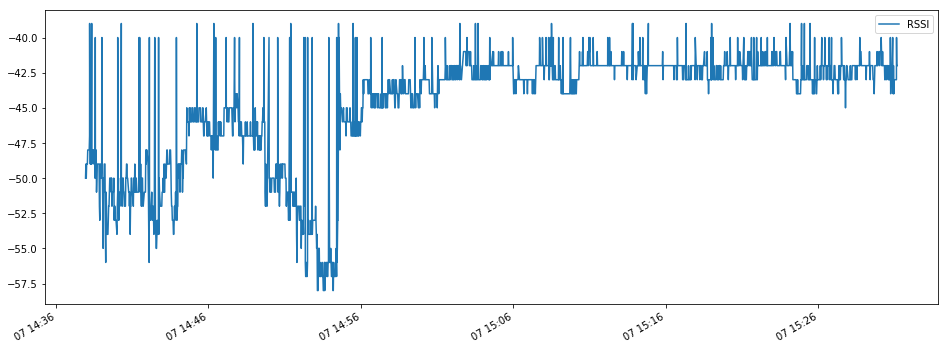

In [10]:
df.plot()

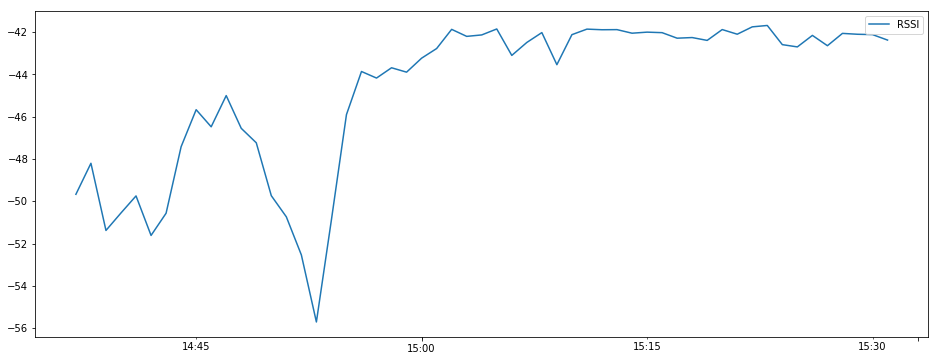

In [11]:
df.resample('T').mean().plot()

## II. Exercises

* To get a better idea of SQL-like query you can pass, open your browser and access "chronograph" at the following url: http://140.105.28.61:8888/

* Play round with database available, tags, fields, pre-defined functions, ...

![data-explorer.png](img/data-explorer.png)

### II.1 Anomaly detection

Choose a sensor of your choice and implement a first very basic anomaly detection algorithm

* **Version 1**: whenever your data exceed a threshold in the past 5 min, put a flag variable to 1
* **Version 2**: whenever your data exceed a threshold 10 times in the past 5 min, put a flag variable to 1
* **Version 3**: plot an histogram of your data over a period you would consider as "normal“. Is it a Gaussian distribution, would you recommend a technique to identify potential anomaly or outliers?

Supplemental: http://scikit-learn.org/stable/modules/outlier_detection.html